<a href="https://colab.research.google.com/github/gonzalezf333/final_IA_avances/blob/main/4_modelo_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
link = 'drive/My Drive/IA_2022/datos_finales_RN.csv'
datos = pd.read_csv(link)
datos.head()

,id_anony,Cod.Car.Sec,tardoCB,PasoCB,recursadas_s1,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S,CIV-PLS13,ECA-PLS13,ELE-PLS13,IND-PLS13,MCT-PLS13,MEC-PLS13
0,es_2677,CGF-PLS13,2,1,0,5.0,3.0,5.0,3.0,5.0,4.0,4.166667,0,0,0,0,0,0
1,es_2728,CGF-PLS13,5,1,2,3.0,1.5,1.5,2.0,2.0,5.0,2.312500,0,0,0,0,0,0
2,es_3008,CGF-PLS13,2,1,0,2.0,3.0,4.0,4.0,5.0,4.0,3.666667,0,0,0,0,0,0
3,es_3110,CGF-PLS13,2,1,0,4.0,4.0,5.0,5.0,5.0,5.0,4.666667,0,0,0,0,0,0
4,es_1810,CIV-PLS13,2,1,0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,1,0,0,0,0,0


In [4]:
np.unique(datos['tardoCB']) # 4 clases: tardo 2, 3, 4, 5 o mas años

array([2, 3, 4, 5, 6, 7])

In [5]:
def clasear(x):
    if x<5:
        return int(x-2)
    else:
        return 3

In [6]:
datos['tardoCB'] = datos['tardoCB'].apply(clasear)

In [7]:
np.unique(datos['tardoCB']) # 4 clases: 0 para 2 años, 1 para 3 años, 2 para 4 años, 3 para 5 años o mas

array([0, 1, 2, 3])

In [8]:
X = datos.drop(columns=['tardoCB','id_anony','PasoCB','Cod.Car.Sec'])
y = pd.DataFrame(datos['tardoCB'].values.astype(np.int64), columns=['tardoCB'])
X.shape, y.shape

((689, 14), (689, 1))

In [9]:
X = X.values.astype(float)
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sn

In [12]:
y_cat = to_categorical(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [42]:
model = Sequential()
model.add(Dense(14, activation='relu' , input_shape=( X.shape[1], ), name = "Capa_de_Entrada"))
model.add(Dense(7, activation='relu'   , name = "Capa_Oculta"))
model.add(Dense(4, activation='softmax', name = "Capa_de_Salida"))
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_de_Entrada (Dense)     (None, 14)                210       
                                                                 
 Capa_Oculta (Dense)         (None, 7)                 105       
                                                                 
 Capa_de_Salida (Dense)      (None, 4)                 32        
                                                                 
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________


Epoch 1/45
4/4 [==============================] - 1s 68ms/step - loss: 1.5779 - accuracy: 0.1616 - val_loss: 1.5226 - val_accuracy: 0.1071
Epoch 2/45
4/4 [==============================] - 0s 13ms/step - loss: 1.4530 - accuracy: 0.2848 - val_loss: 1.4398 - val_accuracy: 0.2143
Epoch 3/45
4/4 [==============================] - 0s 15ms/step - loss: 1.4013 - accuracy: 0.3596 - val_loss: 1.3953 - val_accuracy: 0.3571
Epoch 4/45
4/4 [==============================] - 0s 11ms/step - loss: 1.3744 - accuracy: 0.3939 - val_loss: 1.3678 - val_accuracy: 0.3750
Epoch 5/45
4/4 [==============================] - 0s 11ms/step - loss: 1.3553 - accuracy: 0.4141 - val_loss: 1.3474 - val_accuracy: 0.4107
Epoch 6/45
4/4 [==============================] - 0s 12ms/step - loss: 1.3412 - accuracy: 0.4283 - val_loss: 1.3337 - val_accuracy: 0.4286
Epoch 7/45
4/4 [==============================] - 0s 11ms/step - loss: 1.3288 - accuracy: 0.4283 - val_loss: 1.3196 - val_accuracy: 0.4286
Epoch 8/45
4/4 [===========

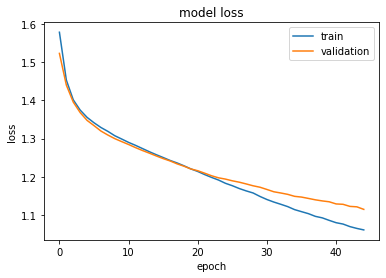

In [43]:
# Train the model
#history = model.fit(X_train, y_train, epochs=150, verbose=1, validation_split=0.1)
history = model.fit(X_train, y_train, 
                      epochs=45, batch_size=128, validation_split=0.1)
model.summary()
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [44]:
# Evaluamos el modelo con métricas
from sklearn import metrics

loss, acc = model.evaluate(X, y_cat)
print("Precisión: ",acc,"\n Valores de pérdida:",loss)

22/22 [==============================] - 0s 4ms/step - loss: 1.0850 - accuracy: 0.5225
Precisión:  0.5224963426589966 
 Valores de pérdida: 1.084962010383606


In [45]:
predictions = model.predict(X_test)

5/5 - 0s - loss: 1.1777 - accuracy: 0.4783 - 26ms/epoch - 5ms/step


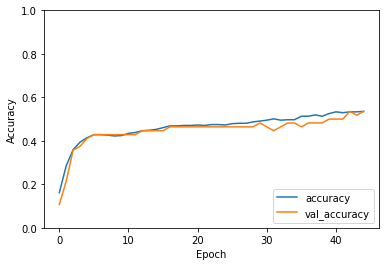

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [47]:
print('test_acc:  ', test_acc*100)
print('test_loss: ', test_loss)

test_acc:   47.826087474823
test_loss:  1.1776562929153442


In [53]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, classification_report

In [49]:
y_test_label = np.argmax(y_test,axis=1) 
y_pred_label = np.argmax(predictions,axis=1)

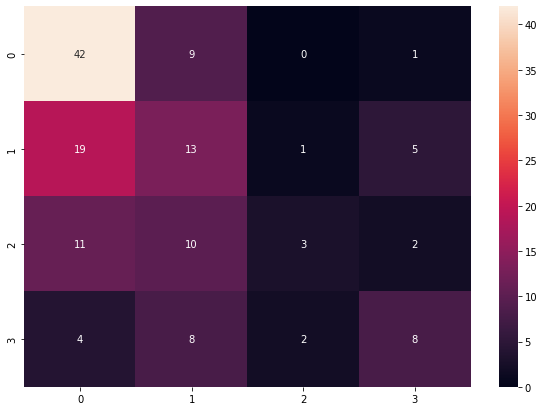

In [50]:
cm = confusion_matrix(y_test_label, y_pred_label)
df_cm = pd.DataFrame(cm, index = [i for i in range(0,4)], columns = [i for i in range(0,4)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

In [51]:
precision_score(y_pred_label, y_test_label, average='macro')

0.40720463746779534

In [52]:
f1_score(y_pred_label, y_test_label,  average='macro')

0.3995339912280702

In [54]:
print(classification_report(y_test_label, y_pred_label, digits=4))

              precision    recall  f1-score   support

           0     0.5526    0.8077    0.6563        52
           1     0.3250    0.3421    0.3333        38
           2     0.5000    0.1154    0.1875        26
           3     0.5000    0.3636    0.4211        22

    accuracy                         0.4783       138
   macro avg     0.4694    0.4072    0.3995       138
weighted avg     0.4716    0.4783    0.4415       138



In [64]:
nn_predictions = [round(val, 0) for val in y_pred_label]

In [70]:
df_Final = pd.DataFrame({'real':y_test_label, 'predicción': nn_predictions})

In [67]:
def clasear_(x):
    return int(x+2)

In [71]:
df_Final['real'] = df_Final['real'].apply(clasear_)
df_Final['predicción'] = df_Final['predicción'].apply(clasear_)

In [72]:
df_Final

,real,predicción
0,3,2
1,4,5
2,4,2
3,3,5
4,2,2
...,...,...
133,2,2
134,2,2
135,2,2
136,2,2
